In [4]:
%load_ext autoreload
%autoreload 2

In [3]:
### IMPORTS
import pandas as pd
import os

# Data

In [13]:
DATA = "data/demo.csv"

### Option 1: Synthetic Data

Generates synthetic data according to a series of functions defined in generating_functions that basically make up a function graph. 

Data Descriptions:

- demo: Generated with function graph based on the DAG in figure TODO in paper (used for demoing purposes)
- standard: Generated with function graph based on the DAG in figure TODO in paper
- upstream_shift: Generated with function graph based on the DAG in figure TODO in paper with a significant change to one of the generating functions of a variables that comes before Y in a topological ordering to be used for distribution shift testing
- downstream_shift: Generated with function graph based on the DAG in figure TODO in paper with a significant change to one of the generating functions of a variables that comes after Y in a topological ordering to be used for distribution shift testing

- mixed_standard: Generated with function graph based on the ADMG in figure TODO in paper




In [9]:
### GENERATE DATA

from generatedata import generate

# generating_functions contants several function nets to generate random data
from generating_functions import demo, standard, mixed_standard, upstream_shift, downstream_shift


generating_data = demo

starting_names = generating_data["starting_names"]
starting_generating_boundaries = generating_data["starting_generating_boundaries"] 
downstream_names = generating_data["downstream_names"]
downstream_generating_functions = generating_data["downstream_generating_functions"]
downstream_parents = generating_data["downstream_parents"]
data = generate(starting_names, starting_generating_boundaries, downstream_names, downstream_generating_functions, downstream_parents, 1000)

df = pd.DataFrame(data)
df.to_csv(generating_data["name"], index=False)


In [10]:
### BINARIZE DATA

from binarize import binarize

binarize(generating_data["name"], generating_data["name"])


### Option 2: Real Data

You can import real data in as a csv file and run the same analysis. This software can only handle binary variables so most real world data will need to be cleaned first.

The cell will clean the data so that it can run in the software but you may lose more information that you want. It removes all rows with non-numeric typed data and then binarizes everything that is left.


In [12]:
### CLEAN DATA
# Only need this if using real data

from fix import remove_strs

remove_strs(DATA)
binarize(DATA, DATA)




# Making the Causal Graph

### Option 1: Dag Drawing Software

pass and nodes and edges that you want to be preloaded into the software by changing the nodes and edges lists below

Some Useful commands when adding nodes:

- click: adds node
- shift+click: moves nearby node to second click (node to move will turn green)
- m: Your next click will select a nearby node to be moved and the following will place it
- Esc: cancels current action

Some Useful commands when adding Edges:

- click 2x: first click starts edge from nearby node and second click connects edge to second node. Note first click is a parent of second click (parent node will turn red)
- Esc: cancels current edge


General Useful commands:

- Cmd-z: Undo
- Cmd-shift-z: Redo
- t: toggle between adding nodes and edges
- p: Returns nodes and edges 



In [14]:
### DAG DRAWING SOFTWARE
# ADMG drawer coming soon

nodes = ['1', '2', '3', '4']
edges = []

_ = os.system(f"python run_dag_draw.py \"{str(nodes)}\" \"{str(edges)}\"")

nodes = ['3', '1', '4', '2']
edges = []


In [15]:
### COPY AND RUN OUTPUT OF ABOVE CELL HERE


### Option 2: Causal Discovery

If you think there is unmeasured confounding in your data run the ADMG discovery cell, otherwise run the DAG discovery. 

You can enter any prior knowledge using the box below

This software requires all edges to be oriented, to do that run the FIX DAG /ADMG cell to finish orienting edges with user knowledge. 

Note: to quit the edge fixing protocol enter q

Important: This is NOT guaranteed to not generate new cycles so be cautions with how edges are oriented.

DAG Edges:

Blue edges of form X --> Y means X causes Y
Brown edges of form X --- Y reprisent edges that could either be oriented X --> Y or Y --> X.

ADMG Edges:

Blue edges of form X --> Y means X causes Y
Red edges of form X <-> Y reprisent unmeasured confounding between X and Y
Green edges of form X --> Y really should be of form X o-> Y. This means either X --> Y or X <-> Y or both.
Orange edges of form X --- Y really should be of form X o-o Y. This means either 1) X --> Y, 2) Y --> X, 3) X <-> Y, 1 and 3, or 2 and 3


In [ ]:
### ENTER KNOWLEDGE ABOUT THE DATA

['V1', 'V2', 'V6', 'V3', 'V4', 'V5', 'Y', 'V7', 'V8', 'V9']
True
[V7 --- V9, V2 --- V5, V6 --- V7, V3 --- V5, Y --- V7, V6 --- Y, V1 --- V3]


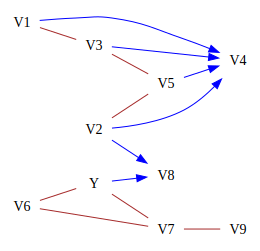

In [24]:
# DAG DISCOVERY
from discovery import run_pc, draw

nodes, edges = run_pc(DATA)#, knowledge="knowledge.txt")

draw(nodes, edges)

['V1', 'V2', 'V6', 'V3', 'V4', 'V5', 'Y', 'V7', 'V8', 'V9']
True


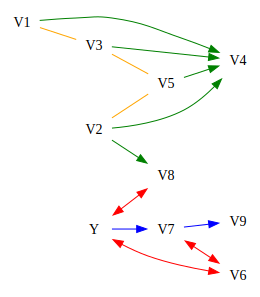

In [22]:
# ADMG DISCOVERY
from discovery import run_fci, draw

nodes, edges = run_fci(DATA)#, knowledge="knowledge.txt")

draw(nodes, edges)



In [27]:
### FIX GRAPHS

from fix import fix_graph

graph_data = fix_graph(nodes, edges)

if len(graph_data) == 3:
    nodes, di_edges, bi_edges = graph_data
else: 
    nodes, edges = graph_data

Which orientation is best:
1. V1 --> V3
2. V3 --> V1 
Which orientation is best:
1. V2 --> V5
2. V5 --> V2 
Which orientation is best:
1. V3 --> V5
2. V5 --> V3 
Which orientation is best:
1. V6 --> V7
2. V7 --> V6 
Which orientation is best:
1. V6 --> Y
2. Y --> V6 
Which orientation is best:
1. V7 --> V9
2. V9 --> V7 
Which orientation is best:
1. Y --> V7
2. V7 --> Y 


### Option 3: Manual Entry

In [ ]:
### MANUAL ENTRY
# Enter nodes and edges here
# Note: do not run if using option 1 or 2 because this will overwrite process

nodes = 'TODO'

# DAG
edges = 'TODO'

# ADMG
di_edges = 'TODO'
bi_edges = 'TODO'
